### Deep Neural Networks for MNIST Classifiaction with Keras

In [1]:
import tensorflow as tf
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Load and Process the Data

an example of a data point with label 4


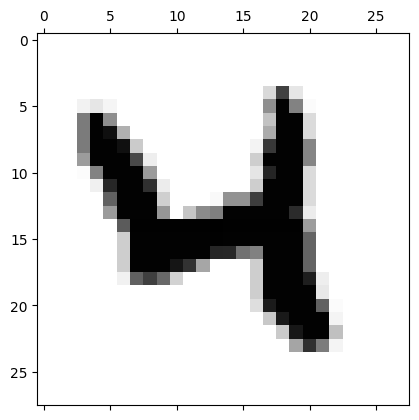

X_train shape: (60000, 784)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [2]:
# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

### Step 2: Define the Neural Net and its Architecture

In [3]:
def create_DNN(drop_rate=0.5):
    # instantiate model
    model = tf.keras.Sequential()
    # add a dense all-to-all relu layer
    model.add(tf.keras.layers.Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # apply dropout
    model.add(tf.keras.layers.Dropout(drop_rate))
    # add a dense all-to-all relu layer
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    # apply dropout
    model.add(tf.keras.layers.Dropout(drop_rate))
    # soft-max layer
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    return model

### Step 3: Choose the Optimizer and the Cost Function

In [4]:
def compile_model(optimizer=tf.keras.optimizers.legacy.SGD(), drop_rate=0.5):
    # create the mode
    model=create_DNN(drop_rate=drop_rate)
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['acc'])
    return model

# define parameterized calls to optimizers
def optSGD(learning_rate=0.001):
    return tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)
def optAdam(learning_rate=0.001):
    return tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)

### Step 4: Train the model

In [5]:
# training parameters
batch_size = 64
epochs = 20

# create the deep neural net
model_DNN=compile_model()

# train DNN and store training info in history
history=model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 1.2703 - acc: 0.5812 - val_loss: 0.4870 - val_acc: 0.8783
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6525 - acc: 0.7992 - val_loss: 0.3463 - val_acc: 0.9057
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5161 - acc: 0.8455 - val_loss: 0.2892 - val_acc: 0.9191
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4493 - acc: 0.8666 - val_loss: 0.2580 - val_acc: 0.9247
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4017 - acc: 0.8823 - val_loss: 0.2340 - val_acc: 0.9323
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3704 - acc: 0.8934 - val_loss: 0.2154 - val_acc: 0.9345
Epoch 7/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3451 - acc: 0.9012 - val_loss: 0.1985 - val_acc: 0.9415
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.

### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 0s 754us/step - loss: 0.1196 - acc: 0.9630

Test loss: 0.11956620961427689
Test accuracy: 0.9629999995231628
1/1 [==============================] - 0s 60ms/step

compare labels to predictions from DNN
an example of a data point with label 7
[[0.0000000e+00 8.4798938e-07]
 [0.0000000e+00 2.9999569e-06]
 [0.0000000e+00 7.8840909e-05]
 [0.0000000e+00 3.6501464e-05]
 [0.0000000e+00 1.9514779e-08]
 [0.0000000e+00 3.9839639e-07]
 [0.0000000e+00 7.5588868e-09]
 [1.0000000e+00 9.9980980e-01]
 [0.0000000e+00 2.3390405e-07]
 [0.0000000e+00 7.0265341e-05]]

an example of a data point with label 2
[[0.0000000e+00 1.6951980e-04]
 [0.0000000e+00 9.6682043e-06]
 [1.0000000e+00 9.9872297e-01]
 [0.0000000e+00 6.3767965e-04]
 [0.0000000e+00 4.0133557e-07]
 [0.0000000e+00 3.3119555e-05]
 [0.0000000e+00 3.3811081e-04]
 [0.0000000e+00 2.5658292e-06]
 [0.0000000e+00 8.5761269e-05]
 [0.0000000e+00 6.4790264e-08]]


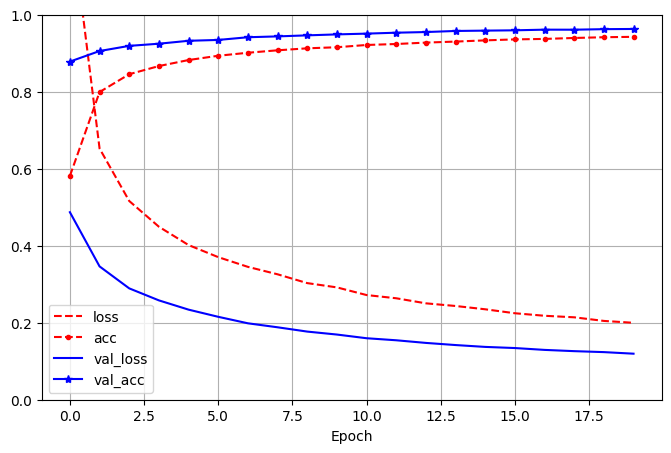

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predicting
X_new = X_test[:2]
Y_pred = model_DNN.predict(X_new)

# look at a couple of examples from test set
print()
print('compare labels to predictions from DNN')
print('an example of a data point with label', np.where(Y_test[0] == 1)[0][0])
print(np.vstack((Y_test[0],Y_pred[0])).T)

print()
print('an example of a data point with label', np.where(Y_test[1] == 1)[0][0])
print(np.vstack((Y_test[1],Y_pred[1])).T)

# look into training history for accuracy and loss
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, ylim=[0, 1], xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="best")  
plt.show()

### Step 6: Modify the Hyperparameters to Optimize Performance of the Model
### TAKES 10 MINUTES!!! DO NOT RUN DURING STUDY GROUP!!!

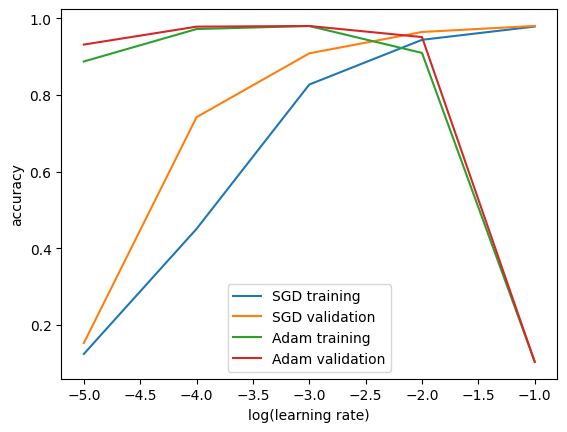

In [10]:
# scan learning rates for SGD
lrateCol = np.logspace(-5, -1, num=5)
hyperSGD = np.zeros((np.size(lrateCol),3))
for i in range(np.size(lrateCol)):
    # create the deep neural net
    model_DNN=compile_model(optimizer=optSGD(learning_rate=lrateCol[i]))
    # train DNN and store training info in history
    history=model_DNN.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          validation_data=(X_test, Y_test))
    hyperSGD[i] = np.array((lrateCol[i],history.history['acc'][-1],history.history['val_acc'][-1]))

# scan learning rates for Adam
lrateCol = np.logspace(-5, -1, num=5)
hyperAdam = np.zeros((np.size(lrateCol),3))
for i in range(np.size(lrateCol)):
    # create the deep neural net
    model_DNN=compile_model(optimizer=optAdam(learning_rate=lrateCol[i]))
    # train DNN and store training info in history
    history=model_DNN.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          validation_data=(X_test, Y_test))
    hyperAdam[i] = np.array((lrateCol[i],history.history['acc'][-1],history.history['val_acc'][-1]))

# plot accuracy as function of learning rate
plt.plot(np.log10(hyperSGD[:,0]),hyperSGD[:,1], label = 'SGD training')
plt.plot(np.log10(hyperSGD[:,0]),hyperSGD[:,2], label = 'SGD validation')
plt.plot(np.log10(hyperAdam[:,0]),hyperAdam[:,1], label = 'Adam training')
plt.plot(np.log10(hyperAdam[:,0]),hyperAdam[:,2], label = 'Adam validation')
plt.xlabel("log(learning rate)")
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.show() 


### TAKES 10 MINUTES!!! DO NOT RUN DURING STUDY GROUP!!!

In [11]:
# scan learning rates and dropout rates
lrateCol = np.logspace(-4, -2, num=3)
drateCol = np.linspace(0.25, 0.75, num=3)
hyperRates = np.zeros((np.size(lrateCol),np.size(drateCol),4))

for i in range(np.size(lrateCol)):
    for j in range(np.size(drateCol)):
        # create the deep neural net
        model_DNN = compile_model(optimizer=optAdam(learning_rate=lrateCol[i]), drop_rate=drateCol[j])
        # train DNN and store training info in history
        history=model_DNN.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          validation_data=(X_test, Y_test))
        hyperRates[i,j] = np.array((lrateCol[i],drateCol[j],history.history['acc'][-1],history.history['val_acc'][-1]))
        filename = "DNN_mnist_lr%idr%i.h5"%((i,j))
        model_DNN.save(filename)
        
print(hyperRates)

/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[[[1.00000000e-04 2.50000000e-01 9.86933351e-01 9.82299984e-01]
  [1.00000000e-04 5.00000000e-01 9.71899986e-01 9.77599978e-01]
  [1.00000000e-04 7.50000000e-01 9.31383312e-01 9.62300003e-01]]

 [[1.00000000e-03 2.50000000e-01 9.92366672e-01 9.83299971e-01]
  [1.00000000e-03 5.00000000e-01 9.80149984e-01 9.80599999e-01]
  [1.00000000e-03 7.50000000e-01 9.40383315e-01 9.71300006e-01]]

 [[1.00000000e-02 2.50000000e-01 9.55850005e-01 9.67999995e-01]
  [1.00000000e-02 5.00000000e-01 9.11366642e-01 9.54100013e-01]
  [1.00000000e-02 7.50000000e-01 6.76699996e-01 8.88599992e-01]]]


In [7]:
# evaluate best model on test set
bestfilename = "DNN_mnist_lr1dr0.h5"
model_DNN = tf.keras.models.load_model(bestfilename)

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 773us/step - loss: 0.0762 - acc: 0.9833

Test loss: 0.07620811462402344
Test accuracy: 0.983299970626831
